## Import Packages

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import zipfile as zf
import numpy as np
import matplotlib.ticker as mtick

## Gathering Data

In [ ]:
df_headers  = pd.read_html('https://www.gov.uk/guidance/about-the-price-paid-data')

col_names = df_headers[0]['Data item']

In [ ]:
pro_2020 =pd.read_csv('http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2020.csv',names = col_names)
pro_2020.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250,2020-01-28 00:00,WV12 5AB,F,Y,L,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,A,A
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500,2020-11-20 00:00,B32 4DA,T,N,F,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500,2020-10-29 00:00,WV6 9NY,F,N,L,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,A,A
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000,2020-02-04 00:00,DY2 9ET,S,N,F,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,A,A
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000,2020-03-09 00:00,CV6 1HS,S,N,F,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,B,A


In [ ]:
pro_2021 =pd.read_csv('http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2021.csv',names = col_names)
pro_2021.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{EC7AD09A-8E40-9200-E053-6C04A8C0E306},222900,2021-10-29 00:00,SW7 4DL,O,N,L,95,FOURTH FLOOR,CROMWELL ROAD,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B,A
1,{EC7AD09A-8E60-9200-E053-6C04A8C0E306},555000,2021-12-21 00:00,RM6 4NT,T,N,F,1,NaN,REYNOLDS AVENUE,CHADWELL HEATH,ROMFORD,REDBRIDGE,GREATER LONDON,B,A
2,{EC7AD09A-8E93-9200-E053-6C04A8C0E306},375000,2021-05-18 00:00,RG40 4QQ,S,N,F,21,NaN,IVANHOE ROAD,FINCHAMPSTEAD,WOKINGHAM,WOKINGHAM,WOKINGHAM,B,A
3,{EC7AD09A-8EAB-9200-E053-6C04A8C0E306},173000,2021-12-02 00:00,RG14 5HF,F,N,L,BARTHOLOMEW COURT,FLAT 31,BARTHOLOMEW STREET,NaN,NEWBURY,WEST BERKSHIRE,WEST BERKSHIRE,B,A
4,{EC7AD09A-8EB9-9200-E053-6C04A8C0E306},2215000,2021-09-29 00:00,SL5 9FG,F,N,L,CHARTERS COURT,APARTMENT 16,CHARTERS ROAD,NaN,ASCOT,WINDSOR AND MAIDENHEAD,WINDSOR AND MAIDENHEAD,B,A


In [ ]:
pro_2022 = pd.read_csv('http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2022.csv',names = col_names)
pro_2022.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{E53EDD2D-F7E3-83EC-E053-6B04A8C03A59},80000,2022-06-28 00:00,L31 5JY,S,N,F,41,NaN,MOORHEY ROAD,NaN,LIVERPOOL,SEFTON,MERSEYSIDE,A,A
1,{E53EDD2D-F7E4-83EC-E053-6B04A8C03A59},215000,2022-05-30 00:00,CH46 0TP,S,N,F,16,NaN,PEMBROKE AVENUE,NaN,WIRRAL,WIRRAL,MERSEYSIDE,A,A
2,{E53EDD2D-F7E5-83EC-E053-6B04A8C03A59},78000,2022-06-10 00:00,L21 8JA,T,N,F,16,NaN,COBB AVENUE,NaN,LIVERPOOL,SEFTON,MERSEYSIDE,A,A
3,{E53EDD2D-F7E6-83EC-E053-6B04A8C03A59},270000,2022-06-21 00:00,CH63 7LT,S,N,F,9,NaN,BARLOW AVENUE,NaN,WIRRAL,WIRRAL,MERSEYSIDE,A,A
4,{E53EDD2D-F7E8-83EC-E053-6B04A8C03A59},161500,2022-06-16 00:00,L21 7PE,S,N,F,9,NaN,MARINA AVENUE,NaN,LIVERPOOL,SEFTON,MERSEYSIDE,A,A


## Data Wrangling

In [ ]:
pro_data = [pro_2020, pro_2021, pro_2022]

In [ ]:
frames = [file for file in pro_data]
df = pd.concat(frames, ignore_index= True)
print(df.shape)
df.head()

(2557296, 16)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250,2020-01-28 00:00,WV12 5AB,F,Y,L,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,A,A
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500,2020-11-20 00:00,B32 4DA,T,N,F,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500,2020-10-29 00:00,WV6 9NY,F,N,L,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,A,A
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000,2020-02-04 00:00,DY2 9ET,S,N,F,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,A,A
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000,2020-03-09 00:00,CV6 1HS,S,N,F,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,B,A


In [ ]:
#checking for data infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557296 entries, 0 to 2557295
Data columns (total 16 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Postcode                           object
 4   Property Type                      object
 5   Old/New                            object
 6   Duration                           object
 7   PAON                               object
 8   SAON                               object
 9   Street                             object
 10  Locality                           object
 11  Town/City                          object
 12  District                           object
 13  County                             object
 14  PPD Category Type                  object
 15  Record Status - monthly file only  object
dtypes: int64(1), object(15)
memory usage

In [ ]:
#checking for null value
df.isnull().sum()

Transaction unique identifier              0
Price                                      0
Date of Transfer                           0
Postcode                                8061
Property Type                              0
Old/New                                    0
Duration                                   0
PAON                                       0
SAON                                 2250003
Street                                 48395
Locality                             1581365
Town/City                                  0
District                                   0
County                                     0
PPD Category Type                          0
Record Status - monthly file only          0
dtype: int64

In [ ]:
#checking for duplicate
df.duplicated().sum()

0

### Quality issues

- change price data type from integer to float
- change date to timestamp
- Rename the following columns from acronyms to their full meaning: 
    > <ol>
            <li>Property type</li> 
            <li>old/new</li>
            <li>Duration</li>
            <li>PPD</li>
    <li>Category Type</li>
      </ol>

In [ ]:
#checking for columns
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Postcode', 'Property Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPD Category Type', 'Record Status - monthly file only'],
      dtype='object')

### change the property type value from acronyms to their full meaning

In [ ]:
#checking property type unique value
df['Property Type'].unique()

array(['F', 'T', 'S', 'D', 'O'], dtype=object)

In [ ]:
#changing the property type value from acronyms to their full meaning
df['Property Type'].replace('F', 'Flats/Maisonettes', inplace= True)
df['Property Type'].replace('T', 'Terraced', inplace= True)
df['Property Type'].replace('D', 'Detached', inplace= True )
df['Property Type'].replace('S', 'Semi-Detached', inplace= True )
df['Property Type'].replace('O', 'Other', inplace= True)

In [ ]:
df['Property Type'].unique()

array(['Flats/Maisonettes', 'Terraced', 'Semi-Detached', 'Detached',
       'Other'], dtype=object)

### change the old/new value from acronyms to their full meaning

In [ ]:
df['Old/New'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
#changing the Old/new value from acronyms to their full meaning
df['Old/New'].replace('N', 'Newly built', inplace = True)
df['Old/New'].replace('Y', 'established residential', inplace = True)

In [ ]:
df['Old/New'].unique()

array(['established residential', 'Newly built'], dtype=object)

### change the duration value from acronyms to their full meaning

In [ ]:
df['Duration'].unique()  

array(['L', 'F'], dtype=object)

In [ ]:
#changing the duration value from acronyms to their full meaning
df['Duration'].replace('L', 'Leasehold', inplace = True)
df['Duration'].replace('F', 'Freehold', inplace= True)

In [ ]:
df['Duration'].unique()

array(['Leasehold', 'Freehold'], dtype=object)

### change the PPD value from acronyms to their full meaning

In [ ]:
#changing the PPD value from acronyms to their full meaning¶
df['PPD Category Type'].unique()

array(['A', 'B'], dtype=object)

In [ ]:
df['PPD Category Type'].replace('A', 'Standard Price', inplace = True)

In [ ]:
df['PPD Category Type'].replace('B', 'Additional Price', inplace = True)

In [ ]:
df['PPD Category Type'].unique()

array(['Standard Price', 'Additional Price'], dtype=object)

In [ ]:
#renaming the country column
df.rename(columns = {'County':'Country'}, inplace = True)

In [ ]:
df.isnull().sum()

Transaction unique identifier              0
Price                                      0
Date of Transfer                           0
Postcode                                8061
Property Type                              0
Old/New                                    0
Duration                                   0
PAON                                       0
SAON                                 2250003
Street                                 48395
Locality                             1581365
Town/City                                  0
District                                   0
Country                                    0
PPD Category Type                          0
Record Status - monthly file only          0
dtype: int64

### Change Price data type from Integer to float

In [ ]:
#changing price data type to float
df['Price'] = df['Price'].astype('float')

In [ ]:
df['Price'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557296 entries, 0 to 2557295
Data columns (total 16 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction unique identifier      object 
 1   Price                              float64
 2   Date of Transfer                   object 
 3   Postcode                           object 
 4   Property Type                      object 
 5   Old/New                            object 
 6   Duration                           object 
 7   PAON                               object 
 8   SAON                               object 
 9   Street                             object 
 10  Locality                           object 
 11  Town/City                          object 
 12  District                           object 
 13  Country                            object 
 14  PPD Category Type                  object 
 15  Record Status - monthly file only  object 
dtypes: float64(1), obj

### Change date column data type from Object to timestamp


In [ ]:
#changing date column data type from object to timestamp
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])

In [ ]:
df['Date of Transfer'].dtype

dtype('<M8[ns]')

In [ ]:
#drop record status column in our data
df.drop(columns = 'Record Status - monthly file only', inplace = True)

##  Exploration

In [ ]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250.0,2020-01-28,WV12 5AB,Flats/Maisonettes,established residential,Leasehold,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,Standard Price
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price


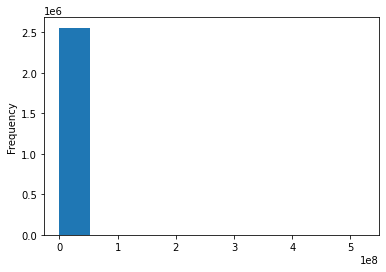

In [ ]:
#examining the dataframe distribution
df['Price'].plot(kind = 'hist');

**The data points are concentrated within a particular region; this shows the presence of outliers.**

### Summary statistics

In [ ]:
df['Price'].describe()

count    2.557296e+06
mean     3.793553e+05
std      1.501725e+06
min      1.000000e+00
25%      1.650000e+05
50%      2.600000e+05
75%      4.030000e+05
max      5.230000e+08
Name: Price, dtype: float64

## Removing the Outliers

In [ ]:
#Removing the outliers using quantile
low,high = df['Price'].quantile([0.05, 0.8])
mask_out = df[df['Price'].between(low,high)]
df = mask_out

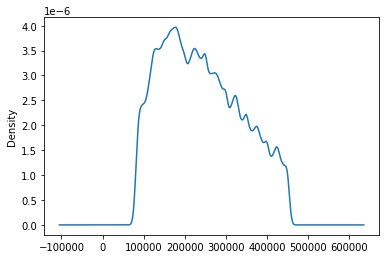

In [ ]:
#checking for the distribution
df['Price'].plot(kind = 'density');

In [ ]:
df['Price'].describe()

count    1.921456e+06
mean     2.415134e+05
std      9.673677e+04
min      8.010000e+04
25%      1.610000e+05
50%      2.300000e+05
75%      3.150000e+05
max      4.500000e+05
Name: Price, dtype: float64

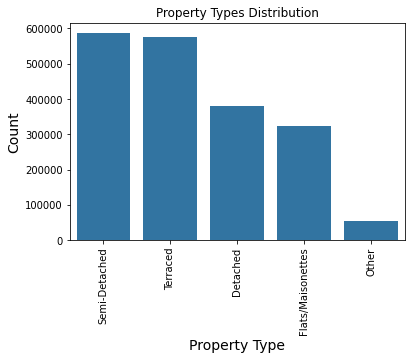

In [ ]:
#Property type distribution
color_base = sb.color_palette()[0]
order_base = df['Property Type'].value_counts().index
sb.countplot(data= df, x= 'Property Type', color = color_base, order = order_base);
plt.xticks(rotation = 90);
plt.xlabel('Property Type', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Property Types Distribution');


Semi-detached has the highest sales, with a count above 500,000. Terraced has the second highest sales, with a count of over 500,000. Detached has the third highest sales, with a count of around 350,000. Flats and maisonettes have the fourth highest sales, with around 300,000 units, while other property types have less than 100,000 count. 


In [ ]:
def pie_chart(columnN):
    sorted_counts = df[columnN].value_counts()
    plt.pie(sorted_counts, labels= sorted_counts.index, startangle= 90, counterclock= False, autopct='%1.2f%%');
    plt.title(columnN + ' ' + 'Distribution');
    

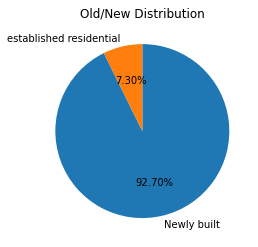

In [ ]:
pie_chart('Old/New')

There is a distribution of 92.85% for newly built residential, while already established residential has a distribution of 7.15%. Hence, there are more new residential than already established residential.

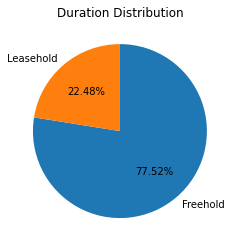

In [ ]:
pie_chart('Duration')

There is a distribution of 22.44% for leasehold, while freehold has 77.56%. Hence, there are more people with freehold than leasehold.

In [ ]:
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Postcode', 'Property Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'Country',
       'PPD Category Type'],
      dtype='object')

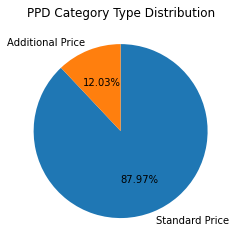

In [ ]:
pie_chart('PPD Category Type')

We have 87.90% for the standard price and 12.10% for the additional price.

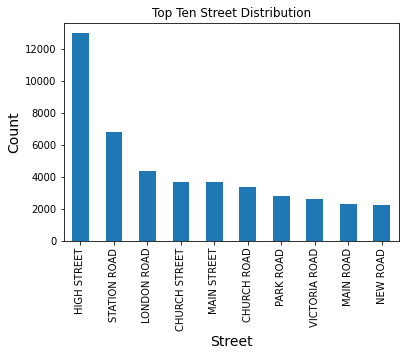

In [ ]:
def top10(Vname):
    bar = df[Vname].value_counts()[:10].plot(kind = 'bar')
    plt.xlabel(Vname, fontsize = 14)
    plt.ylabel('Count', fontsize = 14);
    plt.title('Top Ten' + ' ' +  Vname + ' ' + 'Distribution');
    return bar

top10('Street');

The top 10 street distributions are: High Street, Station Road, London Road, Church Street, Main Street, Church Road, Park Road, Victoria Road, Main Road, and New Road. There are 12627 counts for the high street, 6648 counts for station road, around 4218 counts for London Road, 3568 counts for Church Street, 3560 counts for Main Street, 3265 counts for Church Road, 2678 counts for Park Road, 2512 counts for Victoria Road, 2251 counts for Main Road, and 2190 counts for New Road.




In [ ]:
df['Street'].value_counts()[:10]

HIGH STREET      12995
STATION ROAD      6838
LONDON ROAD       4346
CHURCH STREET     3685
MAIN STREET       3651
CHURCH ROAD       3364
PARK ROAD         2793
VICTORIA ROAD     2580
MAIN ROAD         2303
NEW ROAD          2257
Name: Street, dtype: int64

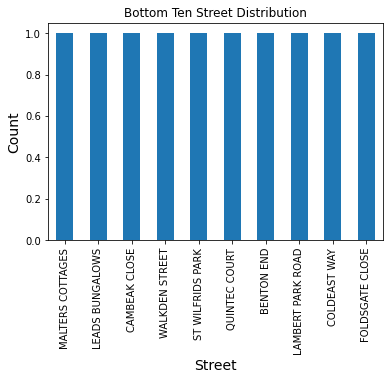

In [ ]:
def bottom10(Vname):
    bar = df[Vname].value_counts(ascending=True)[:10].plot(kind = 'bar')
    plt.xlabel(Vname, fontsize = 14)
    plt.ylabel('Count', fontsize = 14);
    plt.title('Bottom Ten' + ' ' + Vname + ' '  + 'Distribution');
    return bar

bottom10('Street');

The following have the least count: DAGMAR MEWS, PLANTAGENET AVENUE, THE SPA GARDENS, LEEHOLME COURT, BRUELANDS, BAINBRIDGE HOLME CLOSE, DAG HOLE, RAYS ROAD, RED VALE, CURTIS GROVE

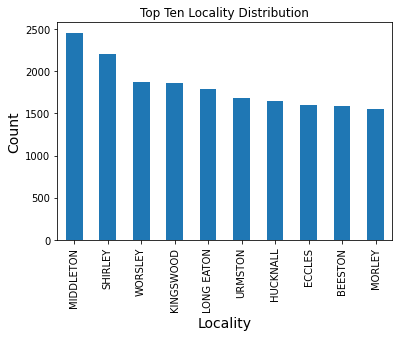

In [ ]:
top10('Locality');

The top 10 localities are: Middleton, Shirley, Kingswood, Worsley, Long Eaton, Hucknail, Eccles, Moreley, Urmston, and Beeston. Middleton has 2360 counts, Shirley has 2136 counts, Worsley has 1807 counts, Kingswood has 1800 counts, Long Eaton has 1749 counts,  Urmston has 1624 counts, Hucknail has 1596,Eccles has 1537 counts, Moreley has 1528 counts, and Beeston has 1489 counts.

In [ ]:
df['Locality'].value_counts()[:10]

MIDDLETON     2454
SHIRLEY       2198
WORSLEY       1868
KINGSWOOD     1861
LONG EATON    1789
URMSTON       1676
HUCKNALL      1652
ECCLES        1594
BEESTON       1582
MORLEY        1555
Name: Locality, dtype: int64

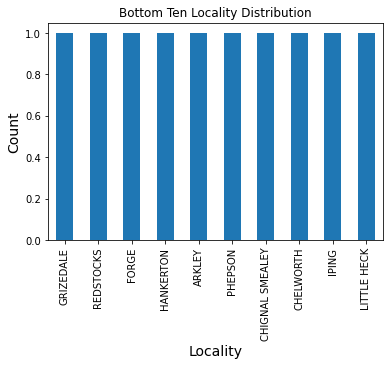

In [ ]:
bottom10('Locality');

The following have the least count: ASHEMEAD GREEN, BUCKLAND RIPES, THELVETON, CHISLET, PARLEY, PROMISED LAND, MUNDERFIELD, STAMFORD, COLNEBRIDGE, BUSH BANK

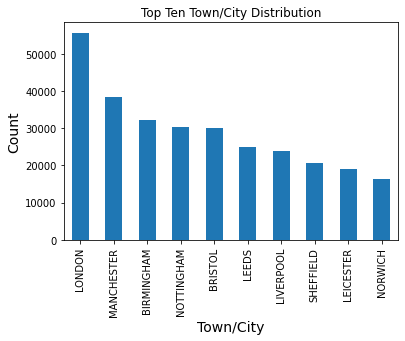

In [ ]:
top10('Town/City');



The top 10 cities are: London, Manchester, Birmingham, Nottingham, Bristol, Liverpool, Leeds, Sheffield, Leicester, and Norwich. London has 53764 counts, Manchester has 37157 counts, Birmingham has 31241 counts, Nottingam has 29243 counts, Bristol has 29106 counts, Leeds has 24245 counts, Liverpool has 23152 counts, Sheffield has 20097 counts, Leicester has 18342 counts, and Norwich has 15832 counts.

In [ ]:
df['Town/City'].value_counts()[:10]

LONDON        55693
MANCHESTER    38436
BIRMINGHAM    32210
NOTTINGHAM    30247
BRISTOL       30100
LEEDS         24969
LIVERPOOL     23779
SHEFFIELD     20664
LEICESTER     18978
NORWICH       16416
Name: Town/City, dtype: int64

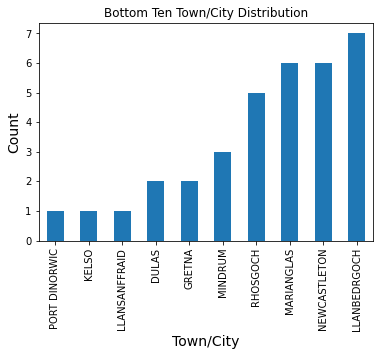

In [ ]:
bottom10('Town/City');

Kelso, Port Dinorwic, and Llansanffraid have the least count, which is 1, while Dulas, Gretna, and Mindrum count is around 2. Rhosgoch count is 5, while Newcasttle and Marianglas have 7 counts, and Llanbedrghouch has 13 counts.

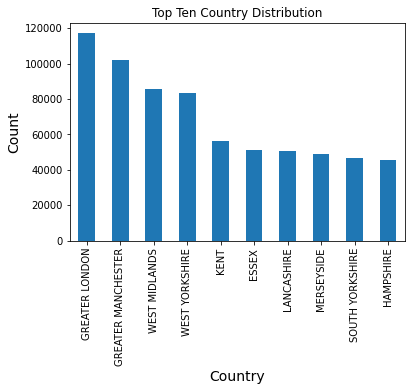

In [ ]:
top10('Country');








The top 10 countries are: Greater London, Greater Manchester, the West Midlands, West Yorkshire, Kent, Essex, Lancashire, Merseyside, South Yorkshire, and Hampshire. Greater London has a count of 113428, Greater Manchester has a count of 99257, the West Midlands has a count of 83187, West Yorkshire has a count of 81423, Kent has a count of 54548, Essex has a count of 49737, Lancashire has a count of 48991, Merseyside has a count of 47791, and South Yorkshire has a count of 45466, and Hampshire has a count of 44380.

In [ ]:
df['Country'].value_counts()[:10]

GREATER LONDON        117118
GREATER MANCHESTER    102280
WEST MIDLANDS          85678
WEST YORKSHIRE         83527
KENT                   56492
ESSEX                  51403
LANCASHIRE             50417
MERSEYSIDE             49053
SOUTH YORKSHIRE        46623
HAMPSHIRE              45814
Name: Country, dtype: int64

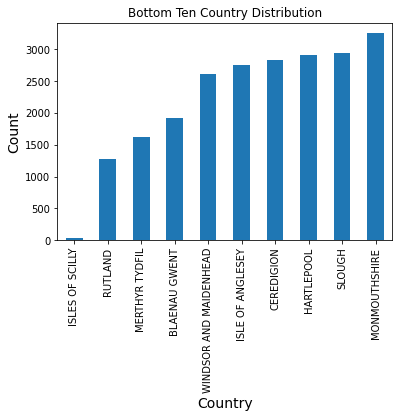

In [ ]:
bottom10('Country');

The bottom 10 countries are ISLES OF SCILLY, RUTLAND, MERTHYR TYDFIL, BLAENAU GWENT, WINDSOR AND MAIDENHEAD, ISLE OF ANGLESEY, CEREDIGION, SLOUGH, HARTLEPOOL, MONMOUTHSHIRE. Isles of scilly has a count of 28, Rutland has a count of 1232, Merthyr Tydfil has a count of 1600, Bleaneau Gwent has a count 1900, Windsor and Maidenhead has a count of 2513, Isle of Anglesey has a count of 2641, Ceredigion has a count of 2722, Slough has a count of 2835, Hartlepool has a count of 2850 and MonMouthshire has a count of 3167

In [ ]:
df['Country'].value_counts(ascending = True)[:10]

ISLES OF SCILLY             29
RUTLAND                   1286
MERTHYR TYDFIL            1617
BLAENAU GWENT             1919
WINDSOR AND MAIDENHEAD    2609
ISLE OF ANGLESEY          2763
CEREDIGION                2828
HARTLEPOOL                2912
SLOUGH                    2946
MONMOUTHSHIRE             3256
Name: Country, dtype: int64

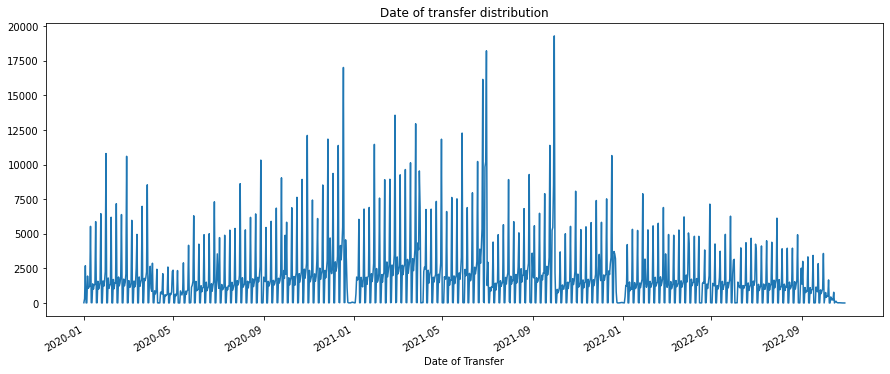

In [ ]:
fig, ax = plt.subplots(figsize = (15,6))
df['Date of Transfer'].value_counts().plot(ax = ax, xlabel = 'Date of Transfer', title = 'Date of transfer distribution');

In [ ]:
df_DIndex = df.set_index('Date of Transfer')
df_DIndex

,Transaction unique identifier,Price,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type
Date of Transfer,,,,,,,,,,,,,,
2020-01-28,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250.0,WV12 5AB,Flats/Maisonettes,established residential,Leasehold,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,Standard Price
2020-11-20,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price
2020-10-29,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price
2020-02-04,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price
2020-03-09,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-12,{EC7AD099-7D24-9200-E053-6C04A8C0E306},450000.0,BH31 6LG,Detached,Newly built,Freehold,19,NaN,SUMMER FIELDS,NaN,VERWOOD,DORSET,DORSET,Standard Price
2022-09-15,{EC7AD099-7D26-9200-E053-6C04A8C0E306},330000.0,SP8 4SL,Detached,Newly built,Freehold,19,NaN,DAVENANT CLOSE,NaN,GILLINGHAM,DORSET,DORSET,Standard Price
2022-10-05,{EC7AD099-7D28-9200-E053-6C04A8C0E306},335000.0,DT3 4PD,Semi-Detached,Newly built,Freehold,1,NaN,KILN TERRACE,CHICKERELL,WEYMOUTH,DORSET,DORSET,Standard Price


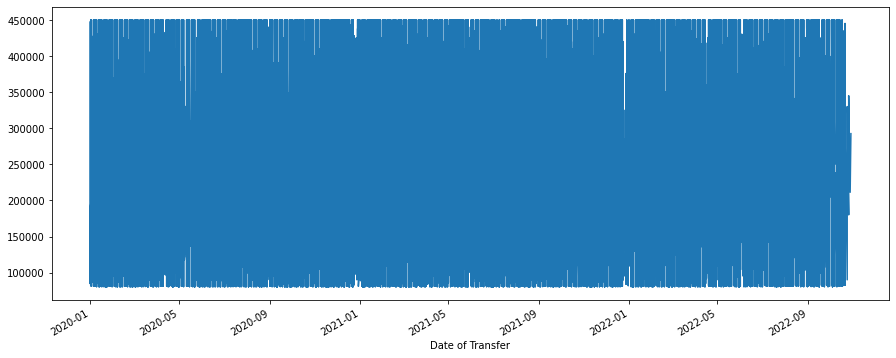

In [ ]:
df_DIndex['Price'].plot(figsize = (15,6));

### Price Trend Per Month

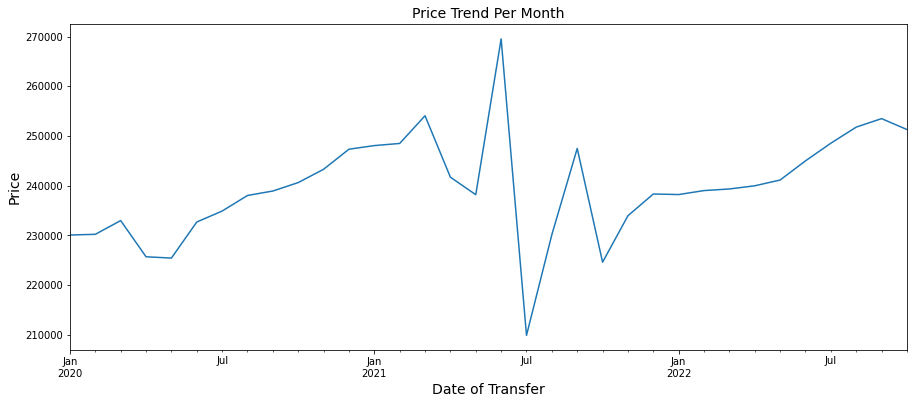

In [ ]:
P_resample_month = df_DIndex['Price'].resample('m').mean()
P_resample_month.plot(figsize = [15,6]);
plt.xlabel('Date of Transfer', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Trend Per Month', fontsize = 14);

The highest price happens in June 2021, with an average price of more than £260,000. The lowest price is in july 2021, with an average price below £210,000. 

### Price Trend Per Year Quartiles

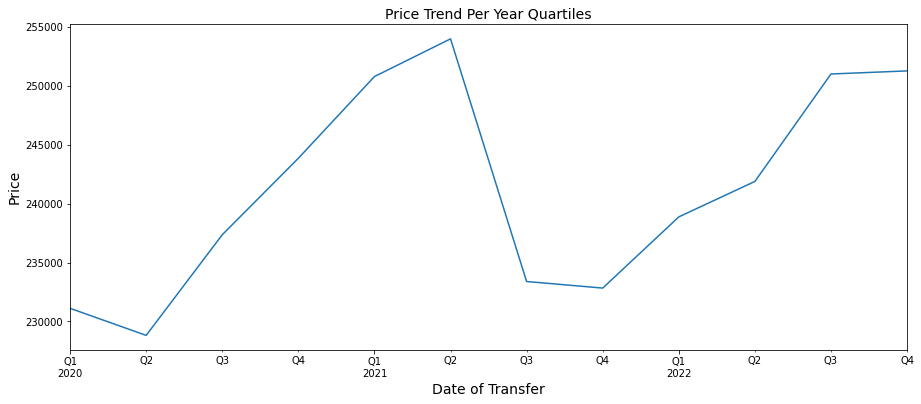

In [ ]:
P_resample_month = df_DIndex['Price'].resample('q').mean()
P_resample_month.plot(figsize = [15,6]);
plt.xlabel('Date of Transfer', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Trend Per Year Quartiles', fontsize = 14);

The highest price happens in the second quarter of 2021, with an average price of more than £250,000, while the lowest price happens in the second quarter of 2020, with an average price below £230,000.

### The Price Trend Per Year

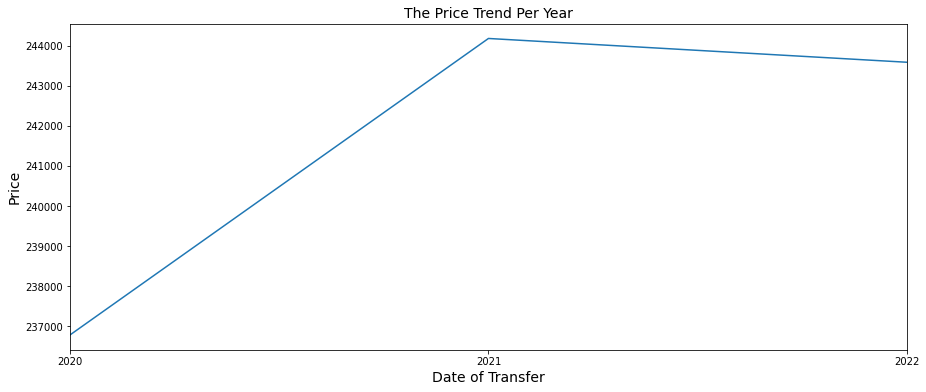

In [ ]:
P_resample_month = df_DIndex['Price'].resample('y').mean()
P_resample_month.plot(figsize = [15,6]);
plt.xlabel('Date of Transfer', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('The Price Trend Per Year', fontsize = 14);

There is a steady increase in price from 2020 to 2021 with the highest peak occurring in 2021, followed by a small drop from 2021 to 2022. Hence, 2021 has the highest price with an average price above 243000, while the lowest price happens in 2020 with a price below 23600.

In [ ]:
#extracting Month 
df['Month_Year'] = df['Date of Transfer'].dt.strftime('%Y-%m')
df.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250.0,2020-01-28,WV12 5AB,Flats/Maisonettes,established residential,Leasehold,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,Standard Price,2020-01
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03


In [ ]:
#masking top 5 countries
top5Country = df['Country'].value_counts()[:5].index
Ctop5Mask = df[df['Country'].isin(top5Country)]
print(Ctop5Mask.shape)
Ctop5Mask.head()

(445095, 16)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250.0,2020-01-28,WV12 5AB,Flats/Maisonettes,established residential,Leasehold,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,Standard Price,2020-01
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03


### Price Trend By Location

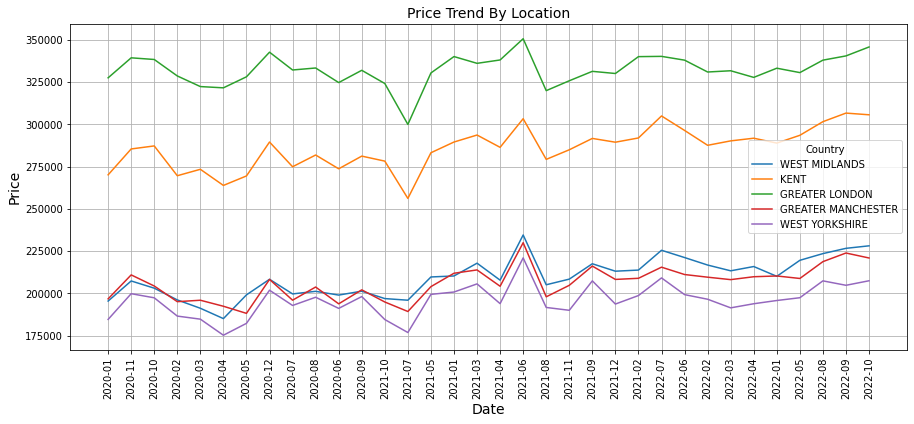

In [ ]:
#figure
plt.figure(figsize=[15,6])
#plot
sb.lineplot(data= Ctop5Mask, x= 'Month_Year', y = 'Price', hue= 'Country', ci=None)
#grid
plt.grid()
plt.xticks(rotation = 90);
#label
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Trend By Location', fontsize = 14);


Greater London has its highest peak in October 2021 with an average price of 350,000, while its lowest peak is in July 2021 with an average price of 300,000. Kent has its highest peak in September 2020 with an average price of around 312,000, and its lowest peak is in July 2021 with an average price of around 253,000. The West Midlands' highest peak occurs in June 2021, with an average price of around 227,000, and the lowest peak occurs in April 2020, with an average price of around 180000. Greater Manchester's highest peak occurs in June 2021, with an average price of around 225,000, and its lowest peak occurs in May 2020, with an average price of around 180000. West Yorkshire has its highest peak in June 2021 with an average price of 220,000, and its lowest peak is in March 2020 and July 2021 with an average price of around 175,000. Hence, Most countries have their highest peak in June 2021 and their lowest peak in July 2021.

### Price Trend By Property Type

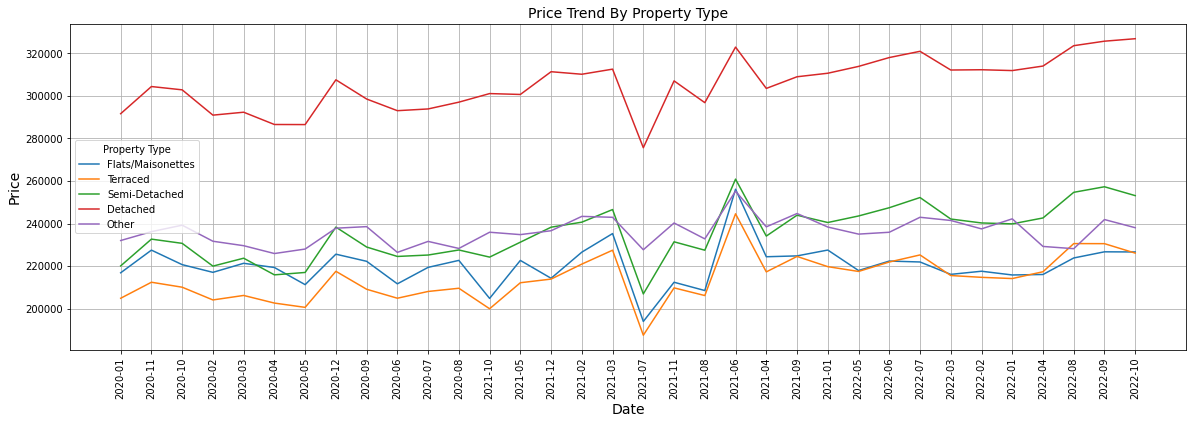

In [ ]:
#figure
plt.figure(figsize=[20,6])

#plot
sb.lineplot(data= df, x= 'Month_Year', y = 'Price', hue= 'Property Type', ci=None)

#grid
plt.grid()

#tick
plt.xticks(rotation = 90);

#label
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Trend By Property Type', fontsize = 14);

The detached property type reaches its highest peak in June 2021, at over £320,000, and its lowest peak is in July 2021, at around £280,000. The semi-detached property type has its highest peak in June 2021 at £260,000 and the lowest peak in July 2021 at around £210,000. The flats and maisonettes property type has its highest peak in June 2021, which is around £260,000, and its lowest peak in July 2021, which is below £200000. Terraced property has its highest peak in June 2021, which is around £240000, and its lowest peak in July 2021, which is below £200000. Hence, we can say there is a reoccurring pattern: the majority of the property types have their highest peak in June 2021, while the majority of the property types have their lowest peak in July 2021.

In [ ]:
#mask newly built
mask_newBuild = df[df['Old/New'].isin(['Newly built'])]
mask_newBuild.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02


### Trend Of Newly Built

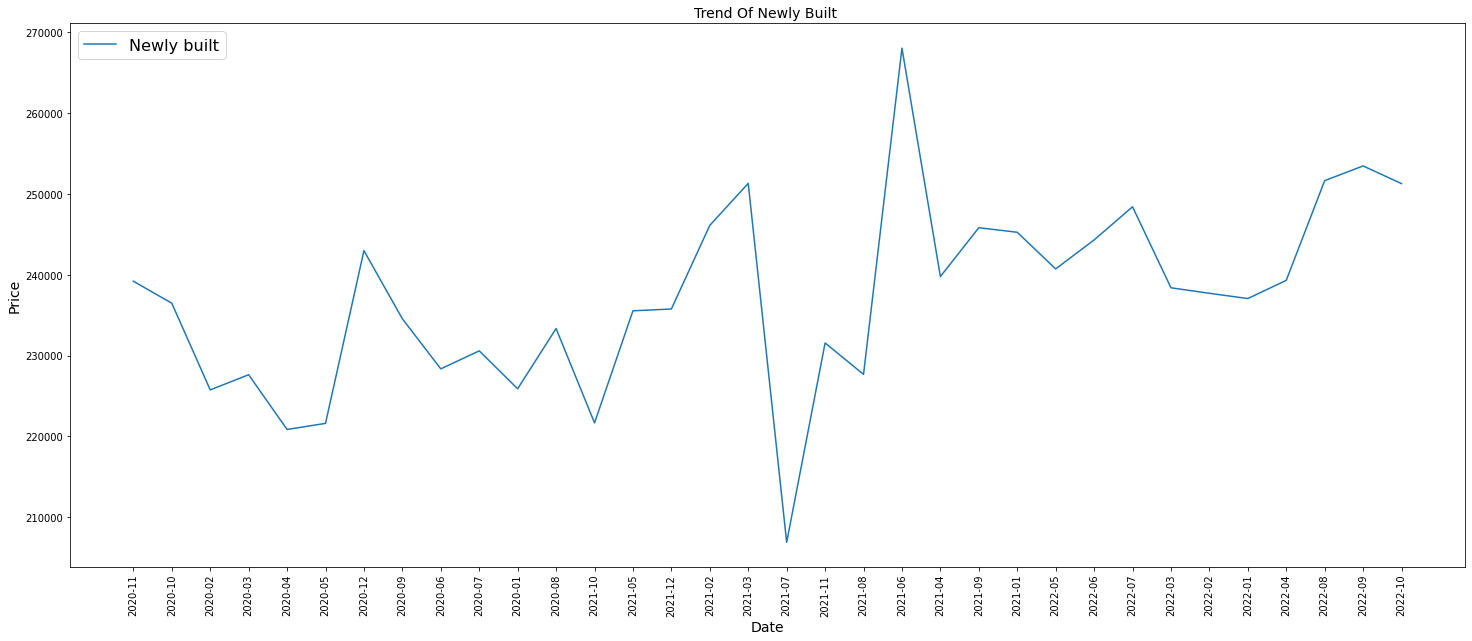

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data= mask_newBuild, x= 'Month_Year', y = 'Price', hue= 'Old/New', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='upper left', fontsize = 16);

#label
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Trend Of Newly Built ', fontsize = 14);

The newly built has its highest peak in june 2021 which is above £260000 while is lowest peak is in July 2021 and it is below £210000.  

In [ ]:
mask_newBuild['pctChange_price'] = round(mask_newBuild['Price'].pct_change()*100)
mask_newBuild.head()

<ipython-input-70-3b18d848751c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_newBuild['pctChange_price'] = round(mask_newBuild['Price'].pct_change()*100)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11,NaN
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10,-45.0
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02,85.0
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03,9.0
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02,-29.0


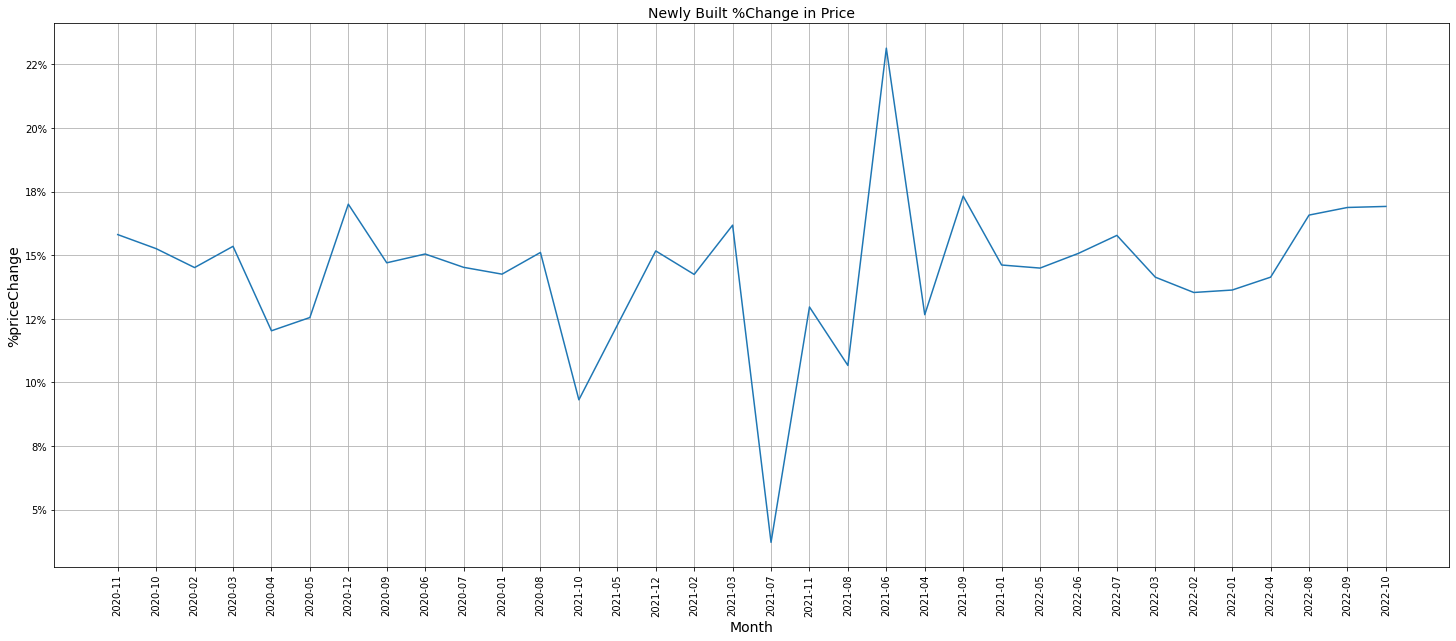

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=mask_newBuild, x= 'Month_Year', y = 'pctChange_price', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);


#label
plt.xlabel('Month', fontsize = 14)
plt.ylabel('%priceChange', fontsize = 14)
plt.title('Newly Built %Change in Price', fontsize = 14);

#grid
plt.grid();

Newly built increased by 18.5% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and increased by 23%, while the lowest peak is observed in July 2021 with a 3% growth rate.

### Sales By Newly Built

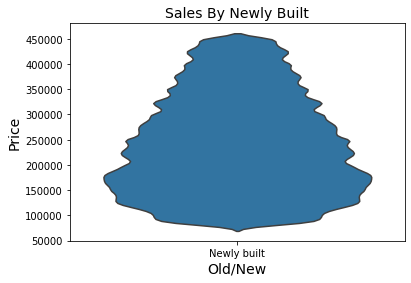

In [ ]:
color_base = sb.color_palette()[0]
sb.violinplot(data= mask_newBuild, x = 'Old/New', y = 'Price', inner= None, color= color_base);
plt.xlabel('Old/New', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Sales By Newly Built', fontsize = 14);

Newly built distribution is more concentrated a little below £200000 while its highest price is £450000.

In [ ]:
#masking country out of new build data frame
t5NewBuild = mask_newBuild[mask_newBuild['Country'].isin(top5Country)]
t5NewBuild.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11,NaN
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10,-45.0
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02,85.0
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03,9.0
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02,-29.0


In [ ]:
t5NewBuild['Country'].unique()

array(['WEST MIDLANDS', 'KENT', 'GREATER LONDON', 'GREATER MANCHESTER',
       'WEST YORKSHIRE'], dtype=object)

### Newly built house price distribution relative to price by Country

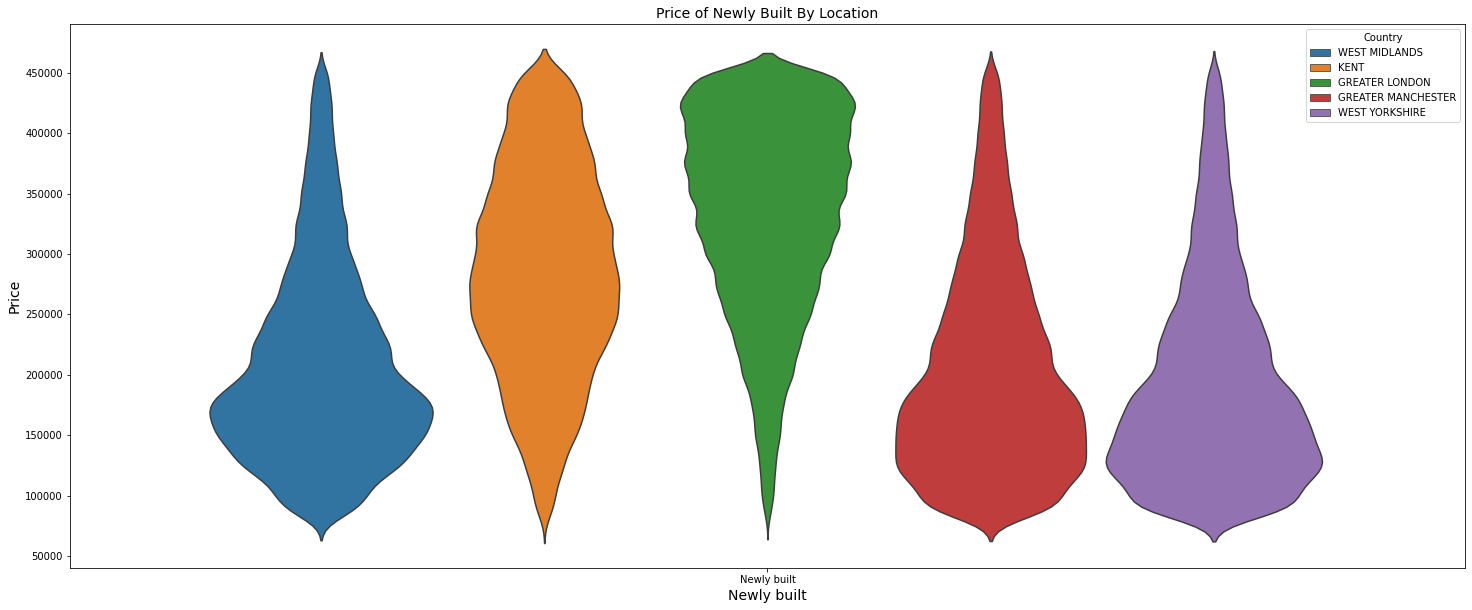

In [ ]:
plt.figure(figsize=[25,10])
sb.violinplot(data= t5NewBuild , x = 'Old/New', y = 'Price', inner= None, hue= 'Country');
plt.xlabel('Newly built', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price of Newly Built By Location', fontsize = 14);

The five countries have their highest prices at £450,000. Greater London's price is more concentrated above 450000; Greater Manchester, West Yorkshire, and the West Midlands are more concentrated below  200,000; and Kent is more concentrated around 250000.

### Newly built house price distribution relative to price by Property type

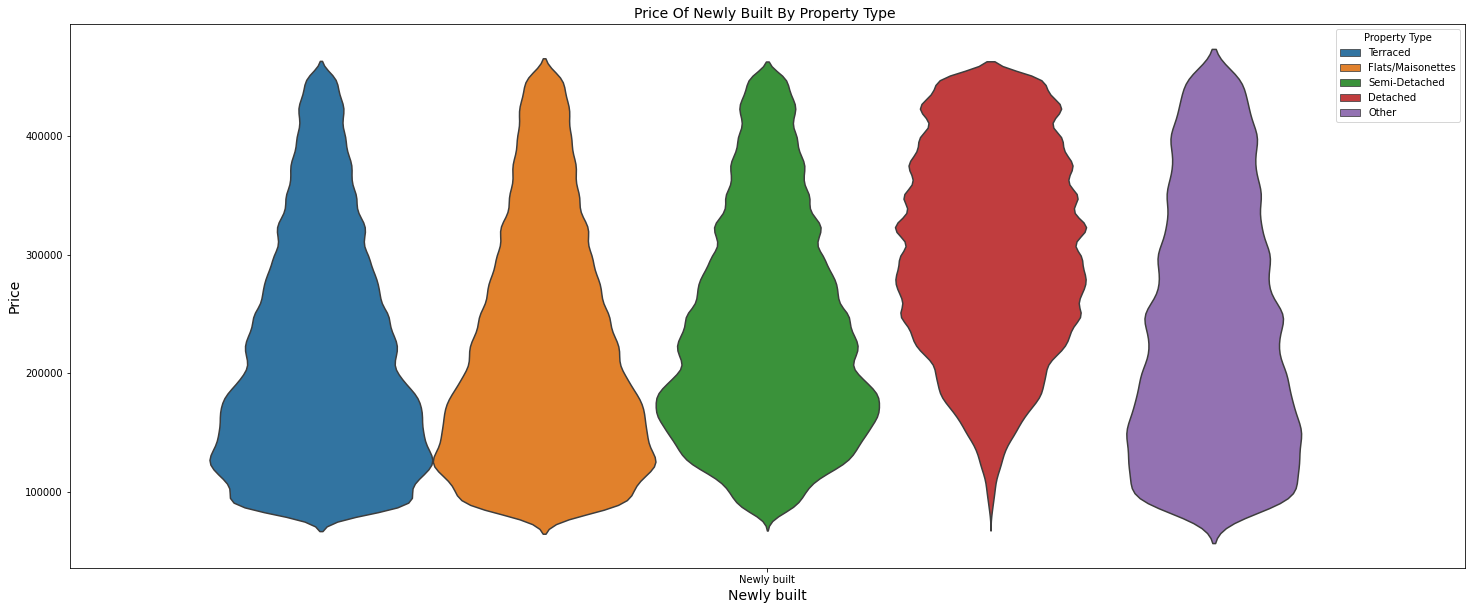

In [ ]:
plt.figure(figsize=[25,10])
sb.violinplot(data= mask_newBuild , x = 'Old/New', y = 'Price', inner= None, hue= 'Property Type');
plt.xlabel('Newly built', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price Of Newly Built By Property Type ', fontsize = 14);

The highest price for the four property types is £450,000, with detached more concentrated around £300,000, flats/maisonettes and terraced more concentrated around £130,000 and semi-detached more concentrated around £170,000. 

# Sales by Established Residential

In [ ]:
#mask established residential
mask_establish = df[df['Old/New'].isin(['established residential'])]
mask_establish.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250.0,2020-01-28,WV12 5AB,Flats/Maisonettes,established residential,Leasehold,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,Standard Price,2020-01
18,{BC8936BB-BC44-0E2C-E053-6C04A8C0DBF4},194950.0,2020-03-13,WV2 2PF,Detached,established residential,Freehold,103,NaN,TANGMERE ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03
20,{BC8936BB-BC47-0E2C-E053-6C04A8C0DBF4},132500.0,2020-05-12,B31 3JS,Flats/Maisonettes,established residential,Leasehold,89,FLAT 2,REDHILL ROAD,NORTHFIELD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-05
21,{BC8936BB-BC48-0E2C-E053-6C04A8C0DBF4},215000.0,2020-05-07,B66 3BW,Terraced,established residential,Freehold,58,NaN,CROCKETTS LANE,NaN,SMETHWICK,SANDWELL,WEST MIDLANDS,Standard Price,2020-05
23,{BC8936BB-BC4A-0E2C-E053-6C04A8C0DBF4},110000.0,2020-05-12,B31 3JS,Flats/Maisonettes,established residential,Leasehold,89,FLAT 1,REDHILL ROAD,NORTHFIELD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-05


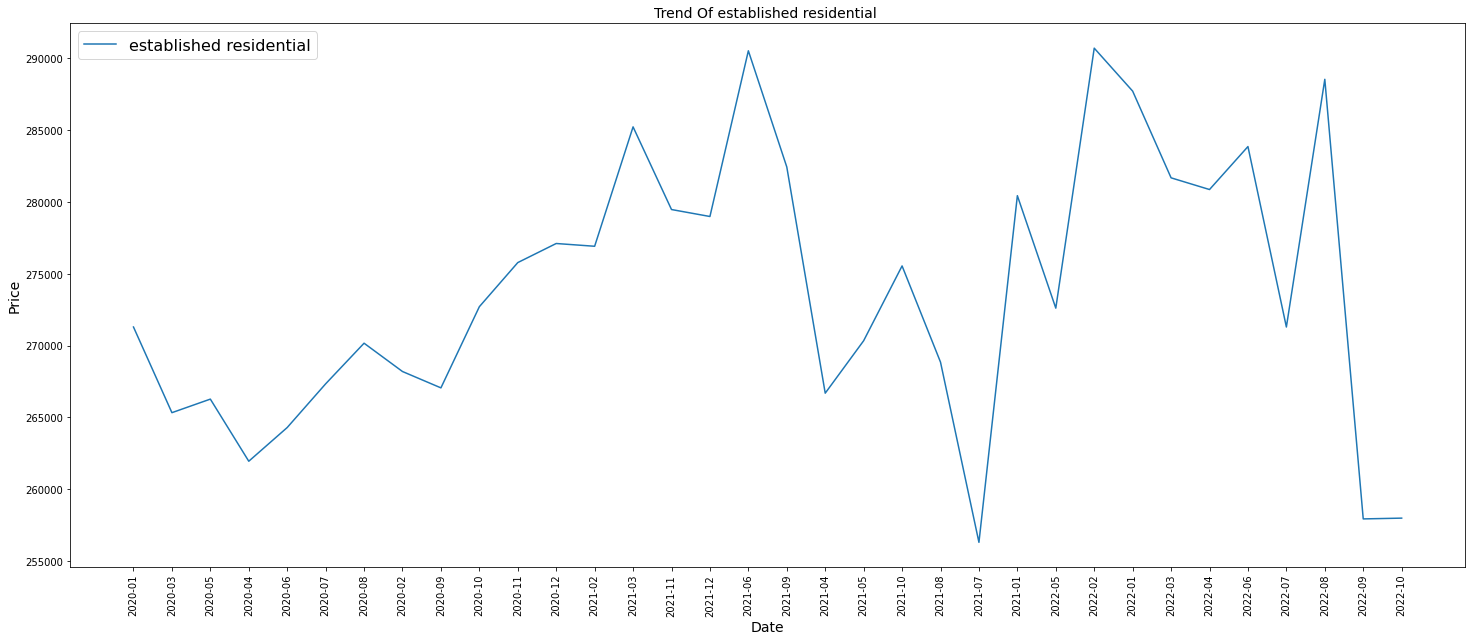

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data=mask_establish, x= 'Month_Year', y = 'Price', hue= 'Old/New', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='upper left', fontsize = 16);

#label
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Trend Of established residential ', fontsize = 14);

There is a steady decrease in the average monthly price of established residential properties from January 2020 to April 2020. The lowest peak is observed in July 2021 with an average price of £250000, while the highest peak is observed in September 2022 with an average price of £340000.

In [ ]:
mask_establish['pctChange_price'] = round(mask_establish['Price'].pct_change()*100)
mask_newBuild.head()

<ipython-input-79-f32bbb708a95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_establish['pctChange_price'] = round(mask_establish['Price'].pct_change()*100)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
1,{BC8936BB-BC2F-0E2C-E053-6C04A8C0DBF4},176500.0,2020-11-20,B32 4DA,Terraced,Newly built,Freehold,83,NaN,KITWELL LANE,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-11,NaN
2,{BC8936BB-BC30-0E2C-E053-6C04A8C0DBF4},97500.0,2020-10-29,WV6 9NY,Flats/Maisonettes,Newly built,Leasehold,WILLOWDALE GRANGE,16,ALDERSLEY ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-10,-45.0
3,{BC8936BB-BC31-0E2C-E053-6C04A8C0DBF4},180000.0,2020-02-04,DY2 9ET,Semi-Detached,Newly built,Freehold,124,NaN,NORTHFIELD ROAD,NaN,DUDLEY,DUDLEY,WEST MIDLANDS,Standard Price,2020-02,85.0
4,{BC8936BB-BC32-0E2C-E053-6C04A8C0DBF4},196000.0,2020-03-09,CV6 1HS,Semi-Detached,Newly built,Freehold,135,NaN,MOSELEY AVENUE,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Additional Price,2020-03,9.0
5,{BC8936BB-BC33-0E2C-E053-6C04A8C0DBF4},140000.0,2020-02-07,CV6 1GT,Terraced,Newly built,Leasehold,23,NaN,HAYNESTONE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,Standard Price,2020-02,-29.0


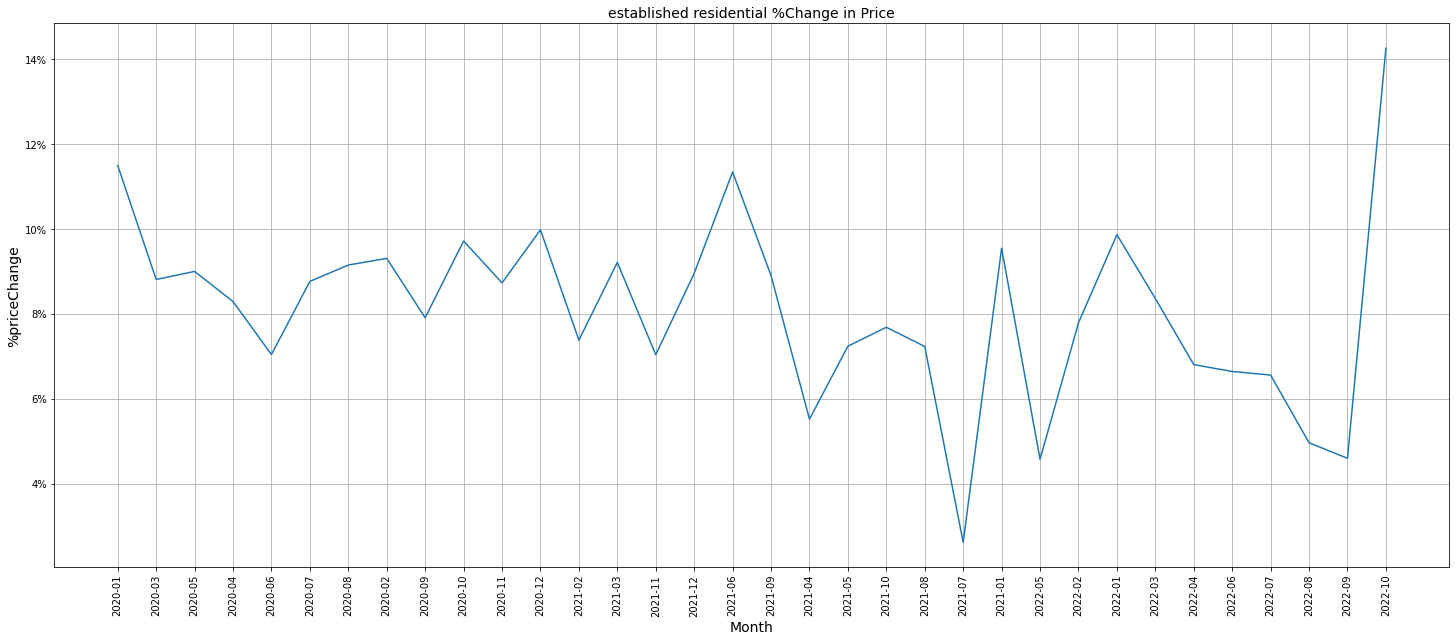

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=mask_establish, x= 'Month_Year', y = 'pctChange_price', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);


#label
plt.xlabel('Month', fontsize = 14)
plt.ylabel('%priceChange', fontsize = 14)
plt.title('established residential %Change in Price', fontsize = 14);

#grid
plt.grid();

In the year to September 2022, established residential increased by 27%. The highest peak of the price growth is observed in September 2022 and increased by 27%, while the lowest peak is observed in July 2021 with a 3% growth rate.


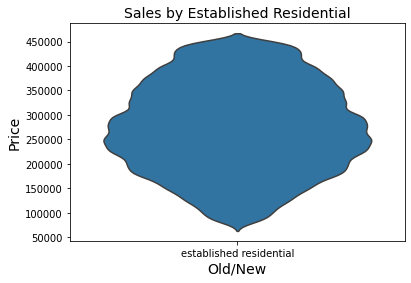

In [ ]:
color_base = sb.color_palette()[0]
sb.violinplot(data= mask_establish, x = 'Old/New', y = 'Price', inner= None, color= color_base);
plt.xlabel('Old/New', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Sales by Established Residential', fontsize = 14);

Established residential distribution is more concentrated around £250000 while its highest price is £450000.

In [ ]:
#masking country out of new establish residential data frame
t5NewEstablish = mask_establish[mask_establish['Country'].isin(top5Country)]
mask_establish.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
0,{BC8936BB-BC2C-0E2C-E053-6C04A8C0DBF4},103250.0,2020-01-28,WV12 5AB,Flats/Maisonettes,established residential,Leasehold,"LICHFIELD HOUSE, 232",FLAT 23,LICHFIELD ROAD,NaN,WILLENHALL,WALSALL,WEST MIDLANDS,Standard Price,2020-01,NaN
18,{BC8936BB-BC44-0E2C-E053-6C04A8C0DBF4},194950.0,2020-03-13,WV2 2PF,Detached,established residential,Freehold,103,NaN,TANGMERE ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03,89.0
20,{BC8936BB-BC47-0E2C-E053-6C04A8C0DBF4},132500.0,2020-05-12,B31 3JS,Flats/Maisonettes,established residential,Leasehold,89,FLAT 2,REDHILL ROAD,NORTHFIELD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-05,-32.0
21,{BC8936BB-BC48-0E2C-E053-6C04A8C0DBF4},215000.0,2020-05-07,B66 3BW,Terraced,established residential,Freehold,58,NaN,CROCKETTS LANE,NaN,SMETHWICK,SANDWELL,WEST MIDLANDS,Standard Price,2020-05,62.0
23,{BC8936BB-BC4A-0E2C-E053-6C04A8C0DBF4},110000.0,2020-05-12,B31 3JS,Flats/Maisonettes,established residential,Leasehold,89,FLAT 1,REDHILL ROAD,NORTHFIELD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,Standard Price,2020-05,-49.0


## Established Residential House Price Distribution Relative to Price by Country


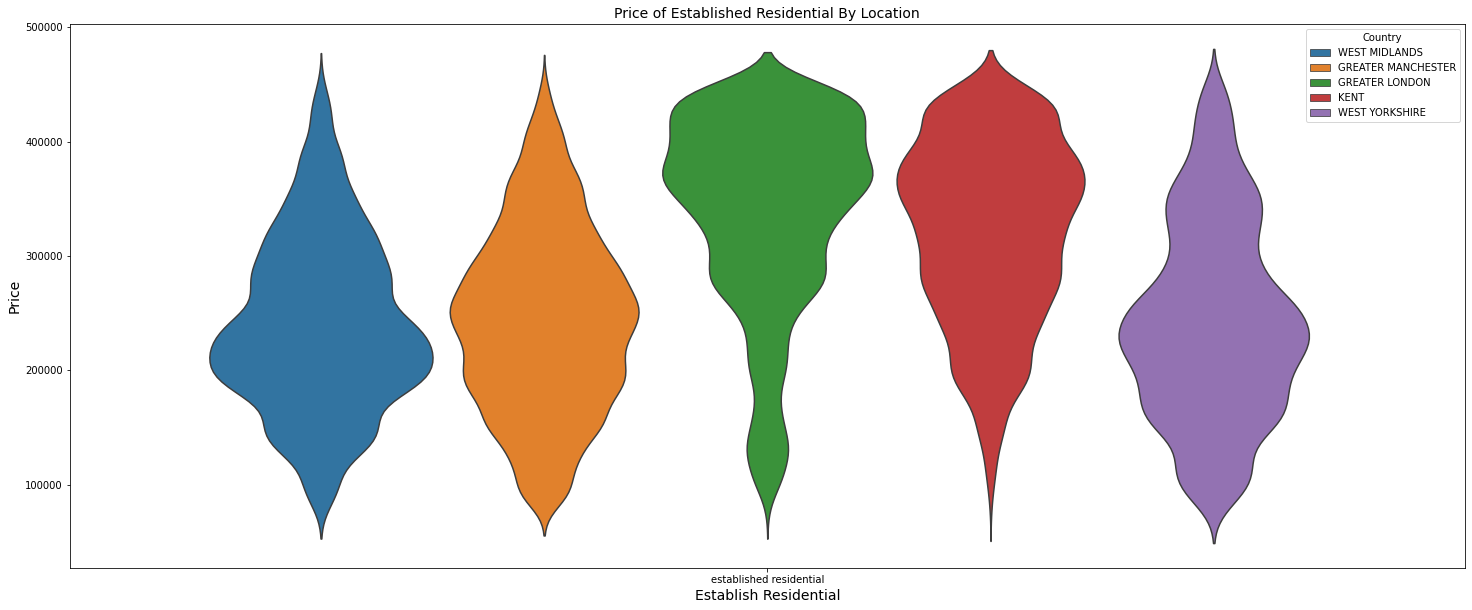

In [ ]:
plt.figure(figsize=[25,10])
sb.violinplot(data= t5NewEstablish , x = 'Old/New', y = 'Price', inner= None, hue= 'Country');
plt.xlabel('Establish Residential', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price of Established Residential By Location', fontsize = 14);

The five countries have their highest prices at £450,000. Greater London's price is more concentrated around £380000; Greater Manchester's price is more concentrated around £280000; West Yorkshire's price is more concentrated around £250000; the West Midlands is more concentrated around £220000; and Kent is more concentrated around £350000.

## Established Residential House Price Distribution Relative to Price by Property Type


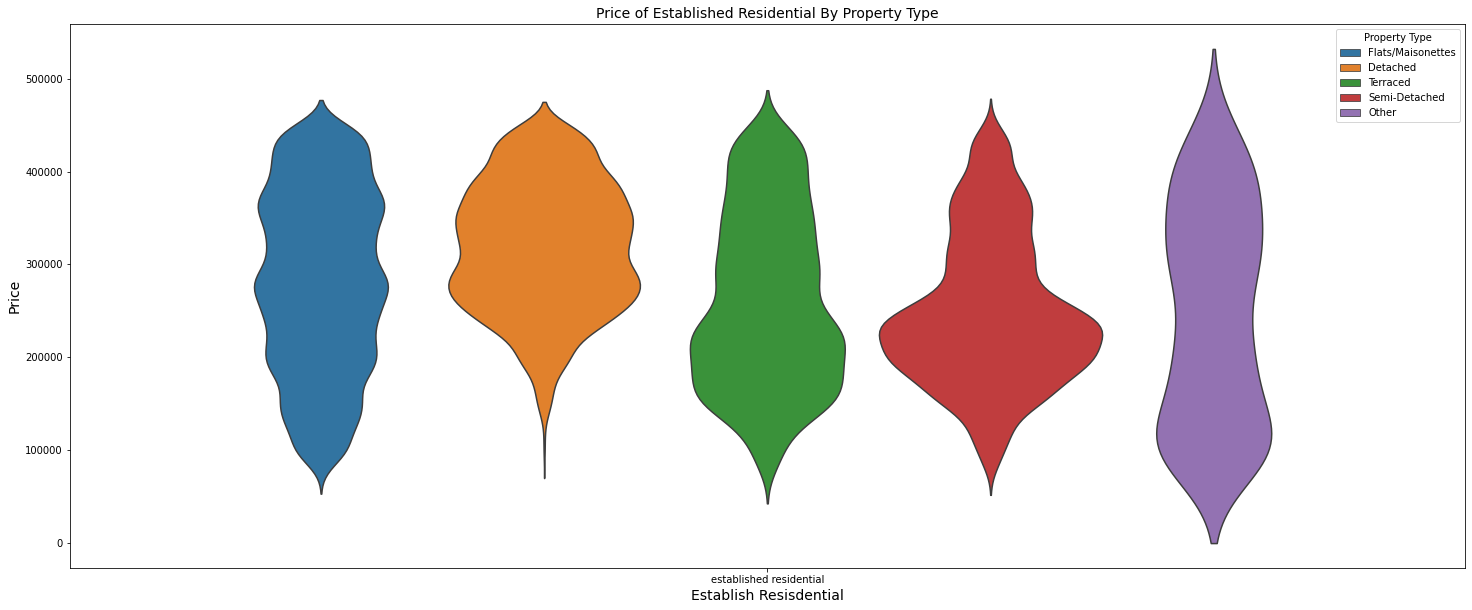

In [ ]:
plt.figure(figsize=[25,10])
sb.violinplot(data= t5NewEstablish , x = 'Old/New', y = 'Price', inner= None, hue= 'Property Type');
plt.xlabel('Establish Resisdential', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Price of Established Residential By Property Type', fontsize = 14);


The highest price for the four property types is £450,000, with detached house more concentrated around £280000, flats and maisonettes more concentrated at around £380000 and £280000, and terraced house more concentrated from £150000 to £200000, while semi-detached house is more concentrated around £200000.


In [ ]:
Ctop5MaskDetached = Ctop5Mask.loc[Ctop5Mask['Property Type'] == 'Detached']
Ctop5MaskDetached.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
18,{BC8936BB-BC44-0E2C-E053-6C04A8C0DBF4},194950.0,2020-03-13,WV2 2PF,Detached,established residential,Freehold,103,NaN,TANGMERE ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03
27,{BC8936BB-BC4F-0E2C-E053-6C04A8C0DBF4},234950.0,2020-03-27,WV10 6FF,Detached,Newly built,Freehold,2,NaN,CADWELL CRESCENT,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03
163,{BC8936BB-A181-0E2C-E053-6C04A8C0DBF4},325000.0,2020-12-18,CT6 6QX,Detached,Newly built,Freehold,9,NaN,THE PADDOCKS,NaN,HERNE BAY,CANTERBURY,KENT,Standard Price,2020-12
164,{BC8936BB-A182-0E2C-E053-6C04A8C0DBF4},376000.0,2020-12-04,ME10 4TY,Detached,Newly built,Freehold,44,NaN,MERLIN CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,Standard Price,2020-12
194,{BC8936BB-A44E-0E2C-E053-6C04A8C0DBF4},343000.0,2020-12-22,CT16 3JA,Detached,Newly built,Freehold,23,NaN,NAPCHESTER ROAD,WHITFIELD,DOVER,DOVER,KENT,Standard Price,2020-12


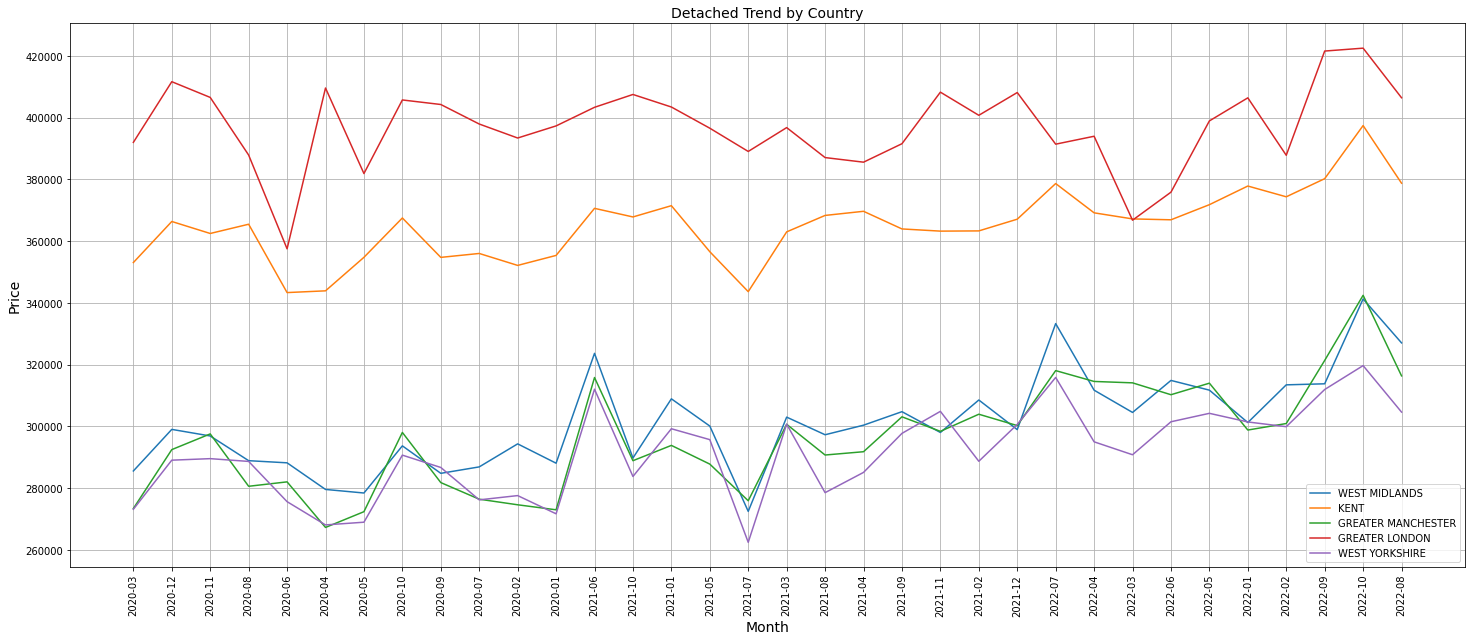

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data=Ctop5MaskDetached, x= 'Month_Year', y = 'Price', hue= 'Country', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 10);

#label
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Detached Trend by Country', fontsize = 14);

#grid
plt.grid()

 <UL>
 <li>At the country level, the largest annual Detached price is Greater London. The highest peak is observed in December 2020 and is above £400000 while the lowest peak is observed in March 2022 and is £358000 </li> 
 

<li>Kent: The highest peak of the price is observed in September 2022 and is above £400000 while the lowest peak is observed in July 2021 and is £340200</li>


<li>Greater Machester: The highest peak of the price is observed in July 2022 and is above £320200 while the lowest peak is observed in April 2022 and is £270000</li>


<li>West Midlands: The highest peak of the price is observed in July 2022 and is £330500 while the lowest peak is observed in July 2021 and is £270500</li>


<li>West Yorkshire: The highest peak of the price is observed in July 2022 and is £310700 while the lowest peak is observed in July 2021 and is £260100</li>

In [ ]:
Ctop5MaskDetached['pctChange_price'] = round(Ctop5MaskDetached['Price'].pct_change()*100)
Ctop5MaskDetached.head()

<ipython-input-87-a14e9daefe10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ctop5MaskDetached['pctChange_price'] = round(Ctop5MaskDetached['Price'].pct_change()*100)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
18,{BC8936BB-BC44-0E2C-E053-6C04A8C0DBF4},194950.0,2020-03-13,WV2 2PF,Detached,established residential,Freehold,103,NaN,TANGMERE ROAD,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03,NaN
27,{BC8936BB-BC4F-0E2C-E053-6C04A8C0DBF4},234950.0,2020-03-27,WV10 6FF,Detached,Newly built,Freehold,2,NaN,CADWELL CRESCENT,NaN,WOLVERHAMPTON,WOLVERHAMPTON,WEST MIDLANDS,Standard Price,2020-03,21.0
163,{BC8936BB-A181-0E2C-E053-6C04A8C0DBF4},325000.0,2020-12-18,CT6 6QX,Detached,Newly built,Freehold,9,NaN,THE PADDOCKS,NaN,HERNE BAY,CANTERBURY,KENT,Standard Price,2020-12,38.0
164,{BC8936BB-A182-0E2C-E053-6C04A8C0DBF4},376000.0,2020-12-04,ME10 4TY,Detached,Newly built,Freehold,44,NaN,MERLIN CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,Standard Price,2020-12,16.0
194,{BC8936BB-A44E-0E2C-E053-6C04A8C0DBF4},343000.0,2020-12-22,CT16 3JA,Detached,Newly built,Freehold,23,NaN,NAPCHESTER ROAD,WHITFIELD,DOVER,DOVER,KENT,Standard Price,2020-12,-9.0


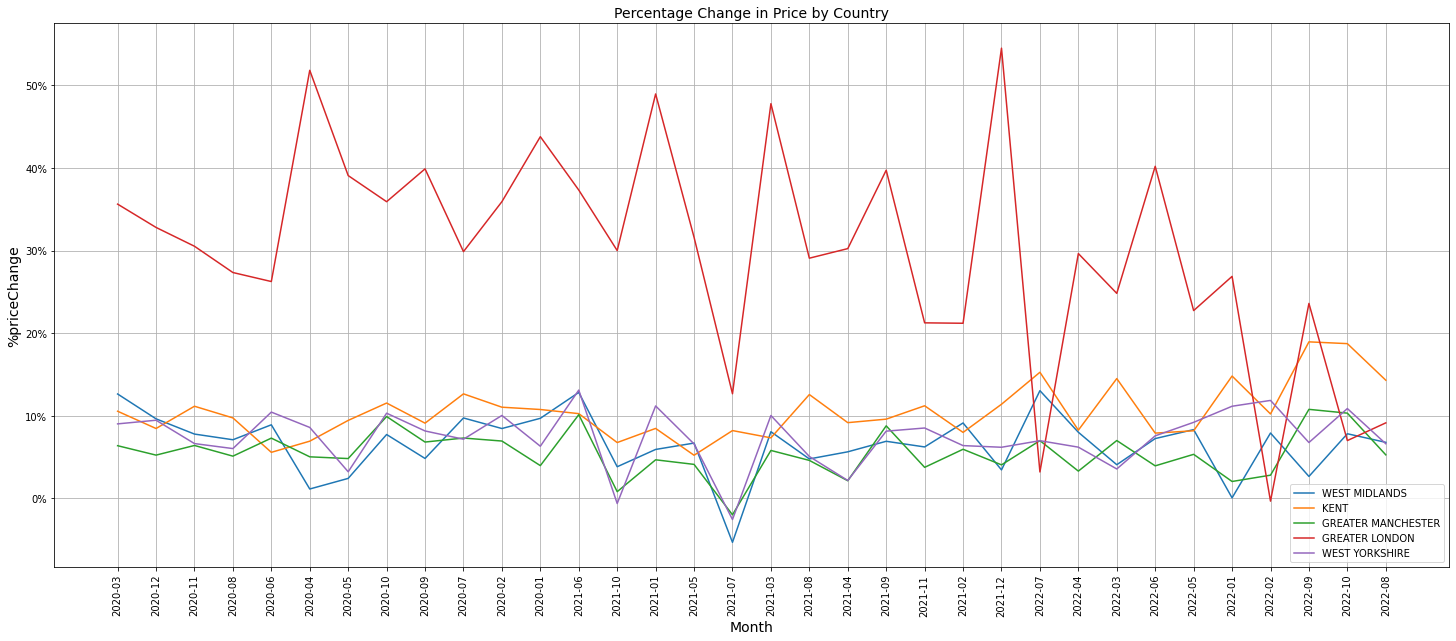

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=Ctop5MaskDetached, x= 'Month_Year', y = 'pctChange_price', hue= 'Country', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 10);

#label
plt.xlabel('Month', fontsize = 14)
plt.ylabel('%priceChange', fontsize = 14)
plt.title('Percentage Change in Price by Country', fontsize = 14);

#grid
plt.grid()


<ul>
<li>At the country level, the largest annual detached price growth in the year to September 2022 was recorded in Greater London, where house prices increased by 14%. The highest peak of the price growth is observed in October 2021 and is above 50%, while the lowest peak is observed in February 2022 and is 5%.</li>

<li>Detached house prices in Kent increased by 8% in the year to September 2022. The highest peak of the price growth is observed in March 2022 and is 14% increased, while the lowest peak is observed in July 2021 and is 4% increased.</li>

<li>Detached house prices in Greater Manchester  increased by 8% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and is 11% increased, while the lowest peak is observed in July 2021 and is 0.8% increased.</li>

<li>In the year to September 2022, detached house prices in the West Midlands will rise by 10%.The highest peak of the price growth is observed in June 2021 and is 12% increased, while the lowest peak is observed in July 2021 and is 0.4% increased.</li>

<li>West Yorkshire detached house prices increased by 4% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and is 12% increased, while the lowest peak is observed in July 2021 and is 0.8% increased.</li>

In [ ]:
#masking Greater London and Greater manchester for semi detached
semiDetached = df.loc[(df['Property Type'] == 'Semi-Detached') & ((df['Country'] == 'GREATER LONDON') | (df['Country'] == 'GREATER MANCHESTER'))]
semiDetached.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
231,{BC8936BB-A71F-0E2C-E053-6C04A8C0DBF4},350000.0,2020-12-17,M25 3JH,Semi-Detached,Newly built,Freehold,26,NaN,MOUNTSIDE CRESCENT,PRESTWICH,MANCHESTER,BURY,GREATER MANCHESTER,Standard Price,2020-12
233,{BC8936BB-A721-0E2C-E053-6C04A8C0DBF4},135000.0,2020-11-13,BL2 2SQ,Semi-Detached,Newly built,Leasehold,115,NaN,CROMPTON WAY,NaN,BOLTON,BOLTON,GREATER MANCHESTER,Additional Price,2020-11
236,{BC8936BB-A727-0E2C-E053-6C04A8C0DBF4},229950.0,2020-12-17,M41 7EQ,Semi-Detached,Newly built,Freehold,3,NaN,LEWIS AVENUE,URMSTON,MANCHESTER,TRAFFORD,GREATER MANCHESTER,Standard Price,2020-12
461,{BC8936BB-BA15-0E2C-E053-6C04A8C0DBF4},230000.0,2020-12-18,BL8 1BA,Semi-Detached,Newly built,Leasehold,147,NaN,BRANDLESHOLME ROAD,NaN,BURY,BURY,GREATER MANCHESTER,Standard Price,2020-12
462,{BC8936BB-BA16-0E2C-E053-6C04A8C0DBF4},208000.0,2020-11-03,BL2 4DB,Semi-Detached,Newly built,Freehold,6,NaN,HILLSIDE CLOSE,BRADSHAW,BOLTON,BOLTON,GREATER MANCHESTER,Standard Price,2020-11


In [ ]:
semiDetached['Country'].unique()

array(['GREATER MANCHESTER', 'GREATER LONDON'], dtype=object)

In [ ]:
semiDetached['Property Type'].unique()

array(['Semi-Detached'], dtype=object)

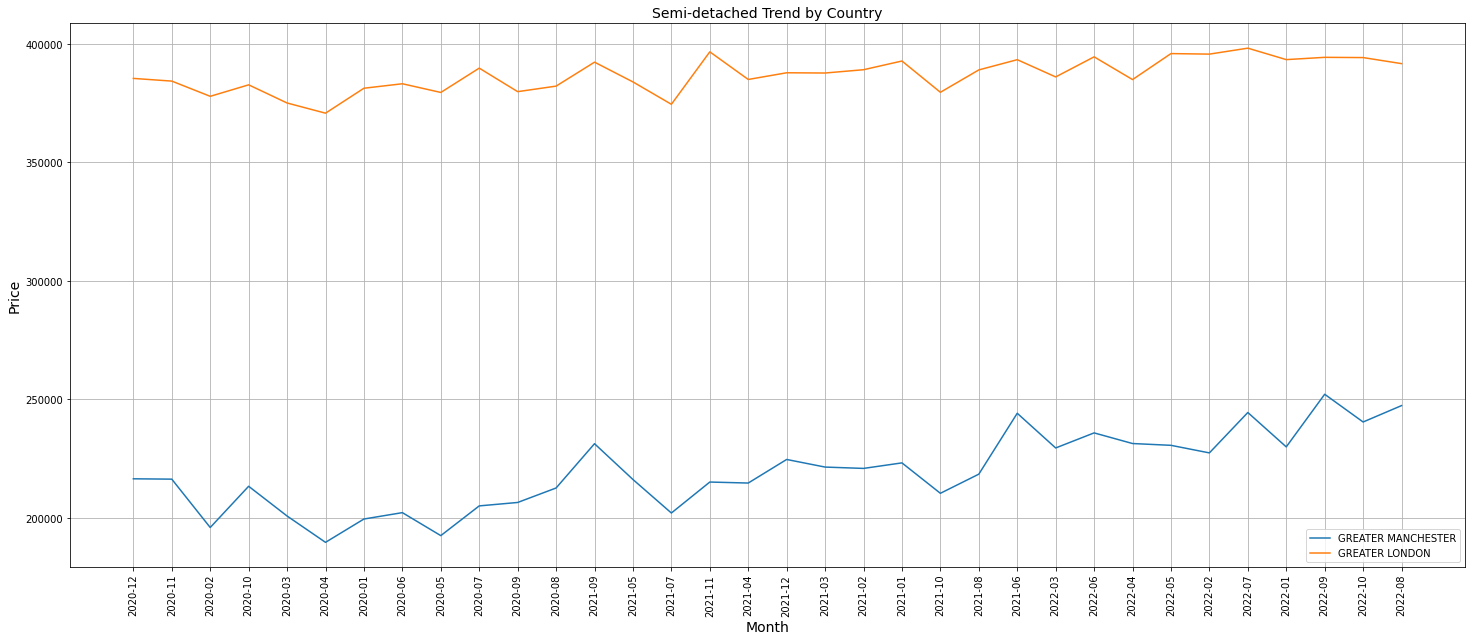

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data= semiDetached, x= 'Month_Year', y = 'Price', hue= 'Country', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 10);

#label
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Semi-detached Trend by Country', fontsize = 14);

#grid
plt.grid()

* Semi-detached in Greater London has its highest peak in July 2022 with an average price of £390500 and its lowest peak in April 2020 with an average price of £370000.

* Semi-detached in Greater Manchester has its highest peak in September 2022 with an average price of £250200 and its lowest peak in April 2020 with an average price below £200000

In [ ]:
semiDetached['pctChange_price'] = round(semiDetached['Price'].pct_change()*100)
semiDetached.head()

<ipython-input-93-8cbc48a05ef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semiDetached['pctChange_price'] = round(semiDetached['Price'].pct_change()*100)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
231,{BC8936BB-A71F-0E2C-E053-6C04A8C0DBF4},350000.0,2020-12-17,M25 3JH,Semi-Detached,Newly built,Freehold,26,NaN,MOUNTSIDE CRESCENT,PRESTWICH,MANCHESTER,BURY,GREATER MANCHESTER,Standard Price,2020-12,NaN
233,{BC8936BB-A721-0E2C-E053-6C04A8C0DBF4},135000.0,2020-11-13,BL2 2SQ,Semi-Detached,Newly built,Leasehold,115,NaN,CROMPTON WAY,NaN,BOLTON,BOLTON,GREATER MANCHESTER,Additional Price,2020-11,-61.0
236,{BC8936BB-A727-0E2C-E053-6C04A8C0DBF4},229950.0,2020-12-17,M41 7EQ,Semi-Detached,Newly built,Freehold,3,NaN,LEWIS AVENUE,URMSTON,MANCHESTER,TRAFFORD,GREATER MANCHESTER,Standard Price,2020-12,70.0
461,{BC8936BB-BA15-0E2C-E053-6C04A8C0DBF4},230000.0,2020-12-18,BL8 1BA,Semi-Detached,Newly built,Leasehold,147,NaN,BRANDLESHOLME ROAD,NaN,BURY,BURY,GREATER MANCHESTER,Standard Price,2020-12,0.0
462,{BC8936BB-BA16-0E2C-E053-6C04A8C0DBF4},208000.0,2020-11-03,BL2 4DB,Semi-Detached,Newly built,Freehold,6,NaN,HILLSIDE CLOSE,BRADSHAW,BOLTON,BOLTON,GREATER MANCHESTER,Standard Price,2020-11,-10.0


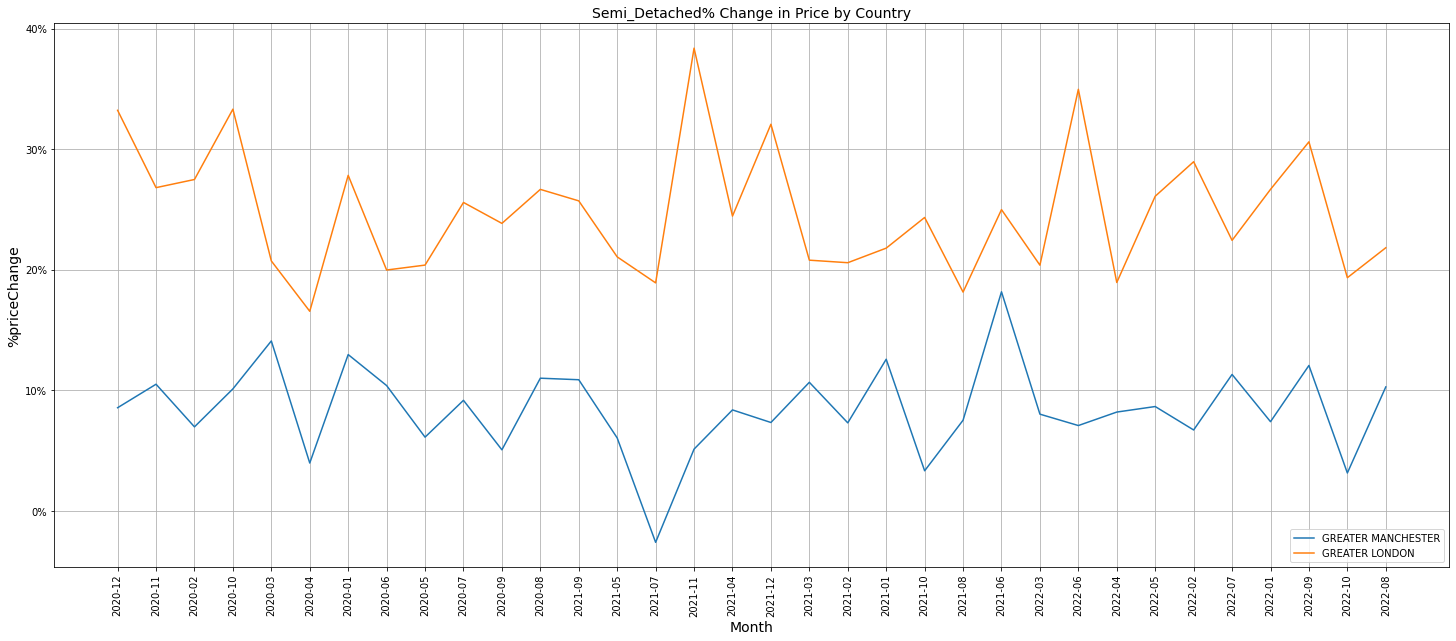

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=semiDetached, x= 'Month_Year', y = 'pctChange_price', hue= 'Country', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 10);

#label
plt.xlabel('Month', fontsize = 14)
plt.ylabel('%priceChange', fontsize = 14)
plt.title('Semi_Detached% Change in Price by Country', fontsize = 14);

#grid
plt.grid()


* In the year to September 2022, semi-detached house prices in Greater London increased by more than 40%.The highest peak of the price growth is observed in September 2022 and increased by over 40%, while the lowest peak is observed in April 2020 with a 14% growth rate.

* Semi-detached house prices in Greater Manchester increased by 15% in the year to September 2022. The highest peak of the price growth is observed in June 2021 and increased by 38%, while the lowest peak is observed in July 2021 with a 0.8% growth rate.

In [ ]:
semiDetached.groupby('Country')['Price'].mean()

Country
GREATER LONDON        386580.806204
GREATER MANCHESTER    219698.606855
Name: Price, dtype: float64

* The average price of a semi-detached property in the Greater London area was £386398.

* A semi-detached house in Greater Manchester cost on average £218562.

In [ ]:
#masking Greater London and Greater manchester for Terraced
Terraced = df.loc[(df['Property Type'] == 'Terraced') & ((df['Country'] == 'GREATER LONDON') | (df['Country'] == 'GREATER MANCHESTER'))]
Terraced.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year
146,{BC8936BB-A16C-0E2C-E053-6C04A8C0DBF4},313000.0,2020-12-18,DA16 2BY,Terraced,Newly built,Freehold,86,NaN,RADNOR AVENUE,NaN,WELLING,BEXLEY,GREATER LONDON,Standard Price,2020-12
162,{BC8936BB-A180-0E2C-E053-6C04A8C0DBF4},180000.0,2020-12-16,DA15 8PH,Terraced,Newly built,Freehold,57,NaN,LIME GROVE,NaN,SIDCUP,BEXLEY,GREATER LONDON,Standard Price,2020-12
232,{BC8936BB-A720-0E2C-E053-6C04A8C0DBF4},119000.0,2020-12-22,OL12 6NB,Terraced,Newly built,Leasehold,7,NaN,JOSEPH STREET,NaN,ROCHDALE,ROCHDALE,GREATER MANCHESTER,Standard Price,2020-12
237,{BC8936BB-A728-0E2C-E053-6C04A8C0DBF4},92000.0,2020-12-15,OL9 7AT,Terraced,Newly built,Freehold,9,NaN,RUTLAND STREET,NaN,OLDHAM,OLDHAM,GREATER MANCHESTER,Standard Price,2020-12
268,{BC8936BB-A9A5-0E2C-E053-6C04A8C0DBF4},195000.0,2020-11-27,M40 2SZ,Terraced,Newly built,Freehold,27,NaN,MORSE ROAD,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,Standard Price,2020-11


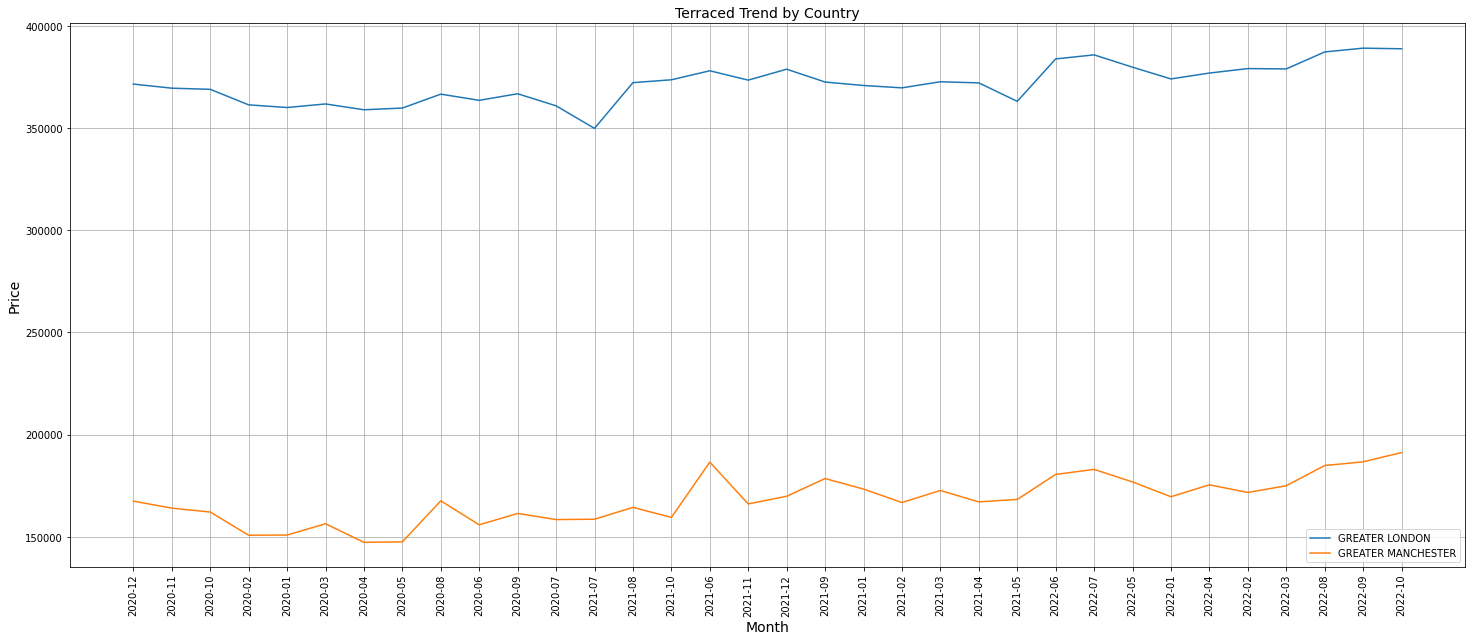

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
sb.lineplot(data= Terraced, x= 'Month_Year', y = 'Price', hue= 'Country', ci=None)

#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 10);

#label
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Terraced Trend by Country', fontsize = 14);

#grid
plt.grid()

* Terraced in Greater London has its highest peak in September 2022 with an average price of £380000 and its lowest peak in July 2021 with an average price of £350000.

* Terraced in Greater Manchester has its highest peak in June 2021 with an average price of £180000 and its lowest peak in April and May 2020 with an average price below £200000

In [ ]:
Terraced.groupby('Country')['Price'].mean()

Country
GREATER LONDON        371187.374386
GREATER MANCHESTER    168575.381862
Name: Price, dtype: float64

In [ ]:
Terraced['pctChange_price'] = round(Terraced['Price'].pct_change()*100)
Terraced.head()

<ipython-input-99-75f08a7bfdaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Terraced['pctChange_price'] = round(Terraced['Price'].pct_change()*100)


,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,Country,PPD Category Type,Month_Year,pctChange_price
146,{BC8936BB-A16C-0E2C-E053-6C04A8C0DBF4},313000.0,2020-12-18,DA16 2BY,Terraced,Newly built,Freehold,86,NaN,RADNOR AVENUE,NaN,WELLING,BEXLEY,GREATER LONDON,Standard Price,2020-12,NaN
162,{BC8936BB-A180-0E2C-E053-6C04A8C0DBF4},180000.0,2020-12-16,DA15 8PH,Terraced,Newly built,Freehold,57,NaN,LIME GROVE,NaN,SIDCUP,BEXLEY,GREATER LONDON,Standard Price,2020-12,-42.0
232,{BC8936BB-A720-0E2C-E053-6C04A8C0DBF4},119000.0,2020-12-22,OL12 6NB,Terraced,Newly built,Leasehold,7,NaN,JOSEPH STREET,NaN,ROCHDALE,ROCHDALE,GREATER MANCHESTER,Standard Price,2020-12,-34.0
237,{BC8936BB-A728-0E2C-E053-6C04A8C0DBF4},92000.0,2020-12-15,OL9 7AT,Terraced,Newly built,Freehold,9,NaN,RUTLAND STREET,NaN,OLDHAM,OLDHAM,GREATER MANCHESTER,Standard Price,2020-12,-23.0
268,{BC8936BB-A9A5-0E2C-E053-6C04A8C0DBF4},195000.0,2020-11-27,M40 2SZ,Terraced,Newly built,Freehold,27,NaN,MORSE ROAD,NaN,MANCHESTER,MANCHESTER,GREATER MANCHESTER,Standard Price,2020-11,112.0


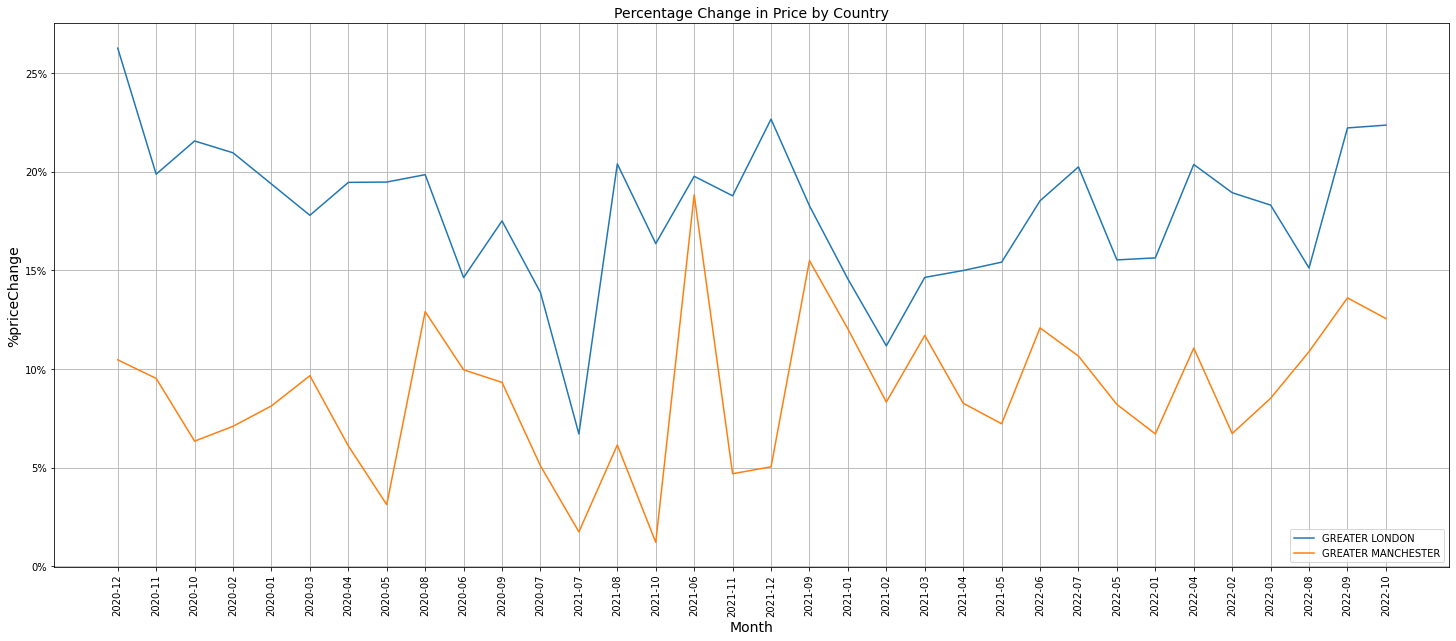

In [ ]:
#figure
plt.figure(figsize=[25,10])

#plot
ax = sb.lineplot(data=Terraced, x= 'Month_Year', y = 'pctChange_price', hue= 'Country', ci=None)
fmt = '%.0f%%' # Format you want the ticks
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
#tick
plt.xticks(rotation = 90);
plt.legend(loc='lower right', fontsize = 10);

#label
plt.xlabel('Month', fontsize = 14)
plt.ylabel('%priceChange', fontsize = 14)
plt.title('Percentage Change in Price by Country', fontsize = 14);

#grid
plt.grid()


* In the year to September 2022, Terraced house prices in Greater London increased by 38%.The highest peak of the price growth is observed in September 2022 and it is 38%, while the lowest peak is observed in July 2021 with a 9% growth rate.

* Terraced house prices in Greater Manchester increased by 21% in the year to September 2022. The highest peak of the price growth is observed in September 2021 and increased by 21%, while the lowest peak is observed in October 2021 with a 0.2% growth rate.